In [10]:
import glob, os

import numpy as np
import astropy.io.fits as pyfits
import matplotlib.pyplot as plt

In [30]:
def frame_stats(fits_list,clip=2.74e26):
    N = len(fits_list)
  
    Names = []
    Mean = []
    Med = []
    Std = []
    X0 = []
    X1 = []
    Nan = []
    Inf = []
    NTot = []
    C0 = []
    C1 = []

    for i in range(N):
        
        f = fits_list[i]
        
        name = os.path.basename(f)
    
        pf = pyfits.open(f)
        #pf.info()
        sci = pf['SCI'].data

        X = sci.flatten()
        
        mean = np.nanmean(X)
        med = np.nanmedian(X)
        std = np.nanstd(X)
        x0 = np.nanmin(X)
        x1 = np.nanmax(X)
        ntot = len(X)
        
        filt = np.isnan(X)
        nan = len(X[filt])
        
        filt = np.isinf(X)
        inf = len(X[filt])
        
        filt = X < -clip
        c0 = len(X[filt])
        
        filt = X > clip
        c1 = len(X[filt])

        Names.append(name)
        Mean.append(mean)
        Med.append(med)
        Std.append(std)
        X0.append(x0)
        X1.append(x1)
        Nan.append(nan)
        Inf.append(inf)
        NTot.append(ntot)
        C0.append(c0)
        C1.append(c1)
        
        print(name)                
        print("Mean =",mean)
        print("Median =",med)
        print("Std =",std)
        print("Min =",x0)
        print("Max =",x1)
        print("Total pixels =",ntot)
        print("NaNs =",nan)
        print("Inf =",inf)
        print("< -%.2e = %i" % (clip,c0))
        print("> %.2e = %i" % (clip,c1))
        print()
        #print(sci)
        
        
    fig = plt.figure(figsize=(10,10))

    ax1 = fig.add_subplot(331)
    ax1.scatter(range(N),Mean)
    ax1.set_title("Mean")
    
    ax2 = fig.add_subplot(332)
    ax2.scatter(range(N),Med)
    ax2.set_title("Median")

    ax3 = fig.add_subplot(333)
    ax3.scatter(range(N),Std)
    ax3.set_title("Std")

    ax4 = fig.add_subplot(334)
    ax4.scatter(range(N),X0)
    ax4.set_title("Min")
    
    ax5 = fig.add_subplot(335)
    ax5.scatter(range(N),X1)
    ax5.set_title("Max")
    
    ax6 = fig.add_subplot(336)
    ax6.scatter(range(N),Nan)
    ax6.set_title("NaN")
    
    ax7 = fig.add_subplot(337)
    ax7.scatter(range(N),Inf)
    ax7.set_title("Inf")
    
    ax8 = fig.add_subplot(338)
    ax8.scatter(range(N),C0)
    ax8.set_title("Clip < -%.2e" % clip)
    
    ax9 = fig.add_subplot(339)
    ax9.scatter(range(N),C1)
    ax9.set_title("Clip > %.2e" % clip)

    
    plt.show()
    
    
        
        

In [12]:
def plot_axe(fits_list, ncols = 4, xsize = 16, v0 = None, v1 = None):

    N = len(fits_list)

    nrows = int(N/ncols + 0.9999)

    ysize = xsize*nrows/ncols # only works because plots are square

    fig = plt.figure(figsize=(xsize,ysize))

    for i in range(N):
    
        f = fits_list[i]
        
        name = os.path.basename(f)
    
        pf = pyfits.open(f)
        img = pf[1].data
       
    
        #print(f)
    
        #print(np.min(img))
        #print(np.max(img))
        #print(np.mean(img))
        #print(np.median(img))
        #print(np.std(img))
        #print()
        if not v0:
            v0 = np.mean(img) - np.std(img)
        if not v1:
            v1 = np.mean(img) + np.std(img)
    
        p = fig.add_subplot(nrows,ncols,i+1)
        p.imshow(img, vmin=v0, vmax=v1, origin="lower")
    
        p.set_title(name,fontdict={'fontsize': 8})
    
    plt.show()

In [13]:
def plot_axe_hist(fits_list, ncols = 4, xsize = 16, bins=100, log=True, x0=None, x1=None,
                  verb = 0):

    N = len(fits_list)

    nrows = int(N/ncols + 0.9999)

    ysize = xsize*nrows/ncols # only works because plots are square

    fig = plt.figure(figsize=(xsize,ysize))

    for i in range(N):
    
        f = fits_list[i]
        
        name = os.path.basename(f)
    
        pf = pyfits.open(f)
        img = pf[1].data   
   
        p = fig.add_subplot(nrows,ncols,i+1)
        X = img.flatten()
        
        x_0 = np.min(X)
        x_1 = np.max(X)
        
        if verb:
            print(f)
            print(np.min(X))
            print(np.max(X))
            print(np.nanmean(X))
            print(np.nanmedian(X))
            print(np.nanstd(X))
            print()
        
        if x0: x_0 = x0
        if x1: x_1 = x1
                
        p.hist(X,bins=bins, range=(x_0,x_1))
        if log: p.set_yscale("log")
        
        
        p.set_xlim(x_0,x_1)
        p.set_title(name,fontdict={'fontsize': 8})
    
    plt.show()

In [14]:
#fits_path = "/home/gwalth/aXeSIM_Roman/OUTSIM/"
#fits_path = "/home/gwalth/data/Roman/grizli/sims/hlss/Prep/"
fits_path = "/home/gwalth/data/Roman/grizli/sims/hlss_single_v5/Prep/"

In [18]:
L = glob.glob(fits_path + "*/*_v5_direct.fits")
#L = glob.glob(fits_path + "*/*-f158_flt.fits")
#L = glob.glob(fits_path + "*roll*_direct.fits")
L.sort()
#print(L)
print(len(L))
#plot_axe(L)
frame_stats(L,clip=2.74e26)

28
Filename: /home/gwalth/data/Roman/grizli/sims/hlss_single_v5/Prep/field_0001/Euclid_Roman_4deg2_field_0001_v5_direct.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   ()      
  1  SCI           1 ImageHDU        71   (4091, 4091)   float32   
  2  ERR           1 ImageHDU        71   (4091, 4091)   float32   
  3  DQ            1 ImageHDU        35   (4091, 4091)   int32   
Mean = 0.006934142
Median = 0.0
Std = 0.06523359
Min = 0.0
Max = 7.608422
Total pixels = 16736281
NaNs = 0
Inf = 0
> 2.74e+26 = 0
< -2.74e+26 = 0
Filename: /home/gwalth/data/Roman/grizli/sims/hlss_single_v5/Prep/field_0002/Euclid_Roman_4deg2_field_0002_v5_direct.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   ()      
  1  SCI           1 ImageHDU        71   (4091, 4091)   float32   
  2  ERR           1 ImageHDU        71   (4091, 4091)   float32   
  3  DQ            1 ImageHDU        35   (

28
Euclid_Roman_4deg2_field_0001_v5_slitless.fits
Mean = 0.010961745
Median = 0.0041528237
Std = 0.025834052
Min = 0.0
Max = 3.513705
Total pixels = 16736281
NaNs = 0
Inf = 0
< -2.74e+26 = 0
> 2.74e+26 = 0

Euclid_Roman_4deg2_field_0002_v5_slitless.fits
Mean = 0.012950273
Median = 0.0045681065
Std = 0.025068885
Min = 0.0
Max = 3.339293
Total pixels = 16736281
NaNs = 0
Inf = 0
< -2.74e+26 = 0
> 2.74e+26 = 0

Euclid_Roman_4deg2_field_0003_v5_slitless.fits
Mean = 0.008766233
Median = 0.0029069767
Std = 0.02001644
Min = 0.0
Max = 2.0444844
Total pixels = 16736281
NaNs = 0
Inf = 0
< -2.74e+26 = 0
> 2.74e+26 = 0

Euclid_Roman_4deg2_field_0004_v5_slitless.fits
Mean = 0.009302848
Median = 0.0024916944
Std = 0.02766393
Min = 0.0
Max = 1.099421
Total pixels = 16736281
NaNs = 0
Inf = 0
< -2.74e+26 = 0
> 2.74e+26 = 0

Euclid_Roman_4deg2_field_0005_v5_slitless.fits
Mean = 0.005862935
Median = 0.0024916944
Std = 0.010667715
Min = 0.0
Max = 2.6208062
Total pixels = 16736281
NaNs = 0
Inf = 0
< -2.74e+

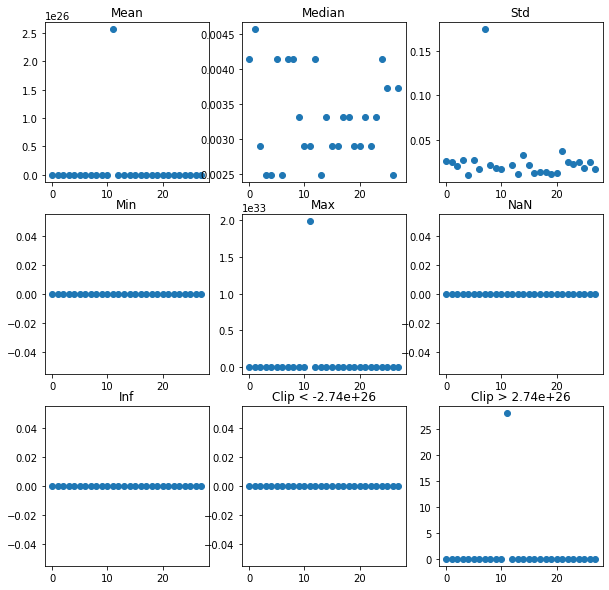

In [31]:
L = glob.glob(fits_path + "*/*_v5_slitless.fits")
#L = glob.glob(fits_path + "*/*-gr_flt.fits")

#L = glob.glob(fits_path + "*_slitless.fits")
#L = glob.glob(fits_path + "*roll*_slitless.fits")
L.sort()
#print(L)
print(len(L))
#plot_axe(L)
frame_stats(L,clip=2.74e26)

28


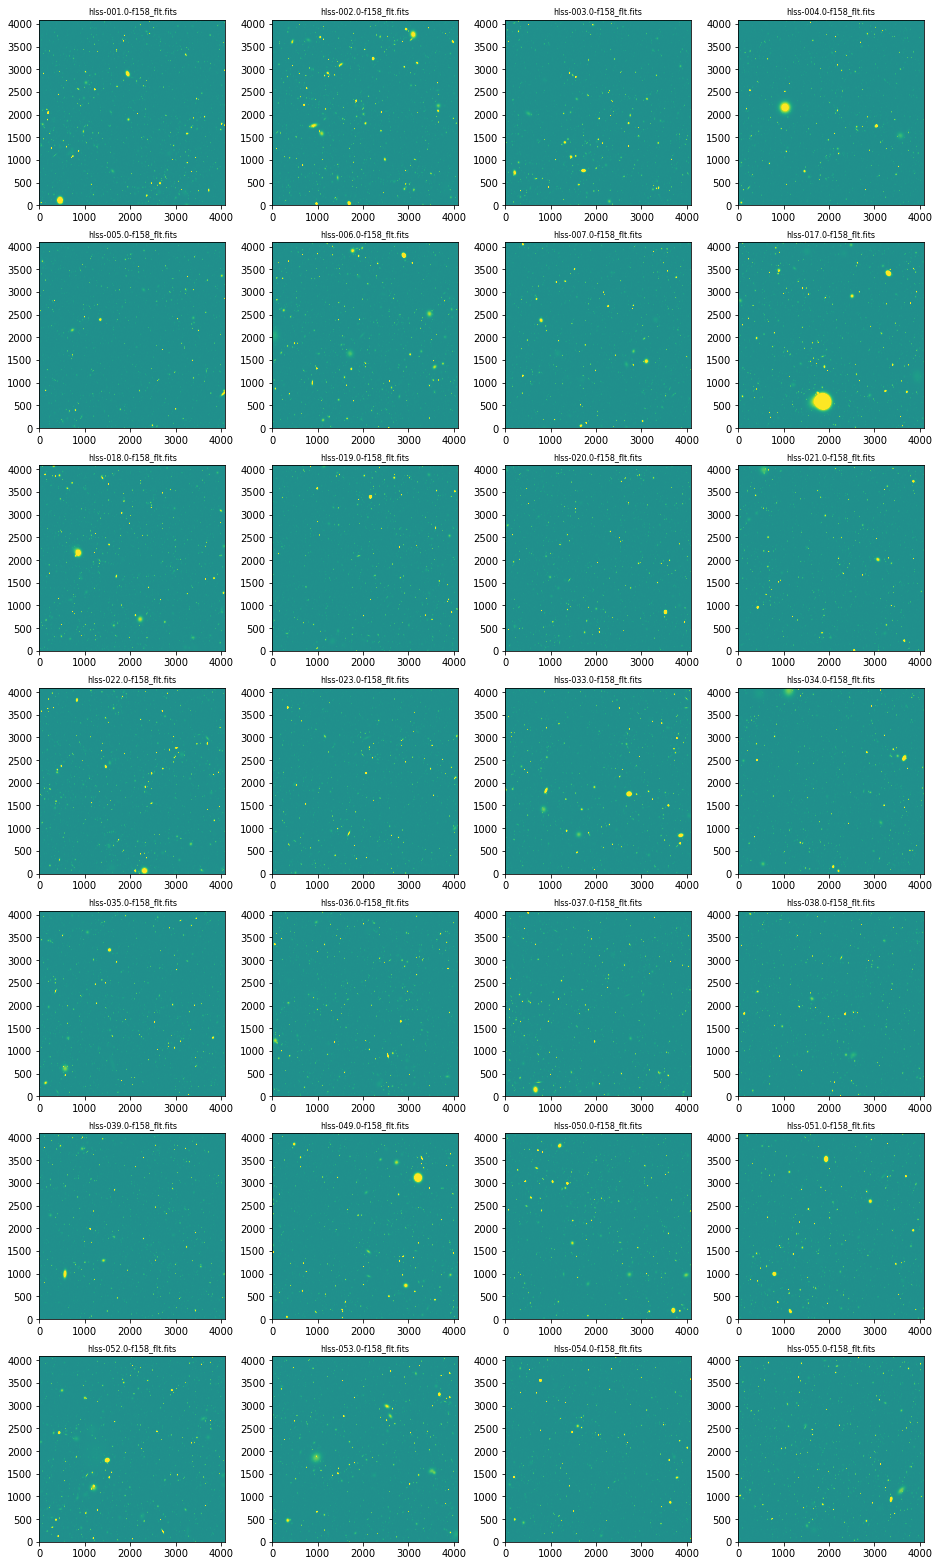

In [6]:
#L = glob.glob(fits_path + "*/*_v5_direct.fits")
L = glob.glob(fits_path + "*/*-f158_flt.fits")
#L = glob.glob(fits_path + "*roll*_direct.fits")
L.sort()
#print(L)
print(len(L))
#plot_axe(L)
plot_axe(L,v0=-0.5,v1=0.5)

28
/home/gwalth/data/Roman/grizli/sims/hlss_single_v5/Prep/field_0001/hlss-001.0-f158_flt.fits
-0.18916439
7.6237583
0.0069361324
0.0021271722
0.07381704

/home/gwalth/data/Roman/grizli/sims/hlss_single_v5/Prep/field_0002/hlss-002.0-f158_flt.fits
-0.1809608
7.5391273
0.007962613
0.0024696651
0.07510913

/home/gwalth/data/Roman/grizli/sims/hlss_single_v5/Prep/field_0003/hlss-003.0-f158_flt.fits
-0.18383864
8.6364975
0.0055206018
0.0017740817
0.06515415

/home/gwalth/data/Roman/grizli/sims/hlss_single_v5/Prep/field_0004/hlss-004.0-f158_flt.fits
-0.19532889
7.6615796
0.005775535
0.0017924402
0.06220819

/home/gwalth/data/Roman/grizli/sims/hlss_single_v5/Prep/field_0005/hlss-005.0-f158_flt.fits
-0.1865847
13.803249
0.0038221925
0.0013765843
0.052118313

/home/gwalth/data/Roman/grizli/sims/hlss_single_v5/Prep/field_0006/hlss-006.0-f158_flt.fits
-0.17907257
10.096617
0.0072056814
0.00234164
0.076368354

/home/gwalth/data/Roman/grizli/sims/hlss_single_v5/Prep/field_0007/hlss-007.0-f158_flt.fi

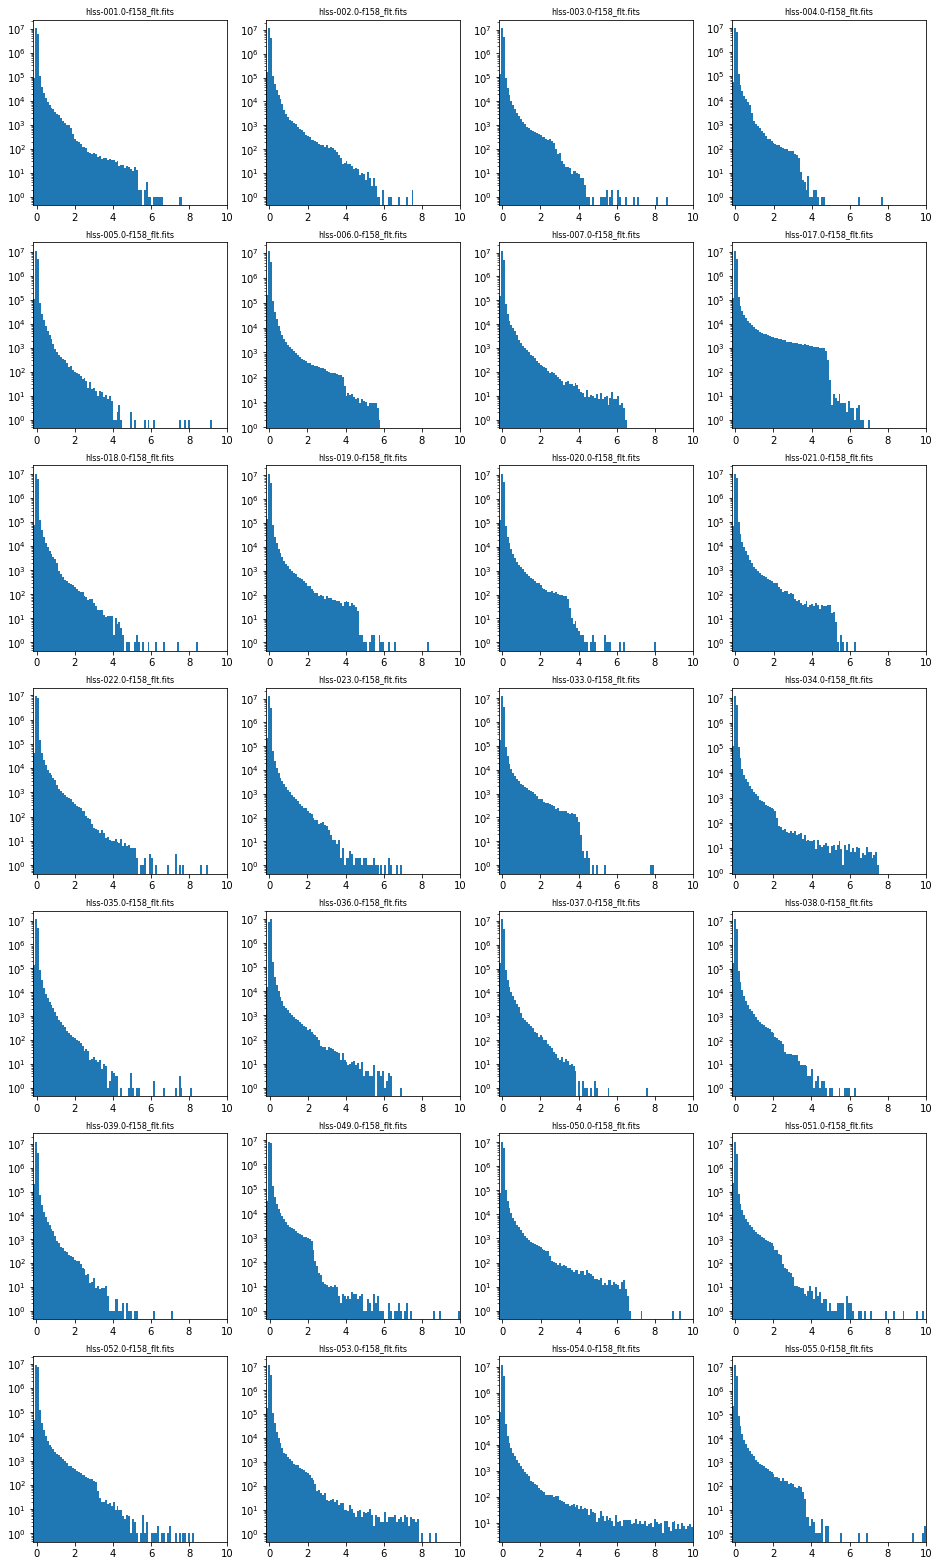

In [7]:
#L = glob.glob(fits_path + "*_v5_direct.fits")
L = glob.glob(fits_path + "*/*-f158_flt.fits")
#L = glob.glob(fits_path + "*_direct.fits")
#L = glob.glob(fits_path + "*roll*_direct.fits")
L.sort()
#print(L)
print(len(L))
plot_axe_hist(L, x1=10, verb=1)

In [ ]:
#L = glob.glob(fits_path + "*_v5_slitless.fits")
L = glob.glob(fits_path + "*/*-gr_flt.fits")

#L = glob.glob(fits_path + "*_slitless.fits")
#L = glob.glob(fits_path + "*roll*_slitless.fits")
L.sort()
#print(L)
print(len(L))
#plot_axe(L)
plot_axe(L,v0=-0.2,v1=0.2)

In [ ]:
#L = glob.glob(fits_path + "*_slitless.fits")
#L = glob.glob(fits_path + "*roll*_slitless.fits")
L = glob.glob(fits_path + "*/*-gr_flt.fits")
L.sort()
#print(L)
print(len(L))
plot_axe_hist(L,x1=5)

In [ ]:
field = "roll_0.0/"
extract_path = "/local/RomanSims/grizli/sims/sim_v3/Extraction/"
#extract_path = "/home/gwalth/data/Roman/grizli/sims/sim_v3/Extraction/"

In [ ]:
L = glob.glob(extract_path + field + "*.full.fits")
#L.sort()
#os.path.getmtime(path)
#print(L[:100])
print(len(L))

In [ ]:
times = [os.path.getmtime(l) for l in L]
times.sort()
print(times[:10])

times = np.array(times)

t_min = np.min(times)
t_max = np.max(times)

times -= t_min

total = t_max - t_min

dt = times[1:] - times[:-1]

In [ ]:
print("Time [sec]  = %.1f" % (total))
print("Time [hr]   = %.1f" % (total/3600.))
print("Time [days] = %.1f" % (total/3600/24.))

In [ ]:
fig = plt.figure()
p = fig.add_subplot(111)
p.scatter(times[1:],dt)
p.set_ylim(0,110)
p.set_xlabel("Time [sec]")
p.set_ylabel("dt [sec]")
plt.show()

In [ ]:
fig = plt.figure()
p = fig.add_subplot(111)
p.scatter(times[1:],dt)
p.set_ylim(0,110)
p.set_xlabel("Time [sec]")
p.set_ylabel("dt [sec]")
plt.show()

In [ ]:
print("min    = %.1f" % (np.min(dt)))
print("max    = %.1f" % (np.max(dt)))
print("mean   = %.1f" % (np.mean(dt)))
print("median = %.1f" % (np.median(dt)))
print("std    = %.1f" % (np.std(dt)))
print("p(16)  = %.1f" % (np.percentile(dt,16)))
print("p(84)  = %.1f" % (np.percentile(dt,84)))

In [ ]:
print("min    = %.1f" % (np.min(dt)))
print("max    = %.1f" % (np.max(dt)))
print("mean   = %.1f" % (np.mean(dt)))
print("median = %.1f" % (np.median(dt)))
print("std    = %.1f" % (np.std(dt)))
print("p(16)  = %.1f" % (np.percentile(dt,16)))
print("p(84)  = %.1f" % (np.percentile(dt,84)))

In [ ]:
fig = plt.figure()
p = fig.add_subplot(111)
p.hist(dt,range=(0,200),bins=50)
p.set_yscale("log")
p.set_xlabel("dt [sec]")
plt.show()

In [ ]:
fig = plt.figure()
p = fig.add_subplot(111)
p.hist(dt,range=(0,200),bins=50)
p.set_yscale("log")
p.set_xlabel("dt [sec]")
plt.show()